In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [153]:
#Load
csv_path = "C:\\Users\\sssns\\Desktop\\New\\10.09.2025\\E_sim\\Case Study\\Case Study/my_dataset.csv"
df = pd.read_csv(csv_path)


In [154]:
df.isnull().sum()

UserID          0
Day             0
Sessions        0
Duration        0
Transactions    0
Spent           0
Revenue         0
OS              0
Country         0
dtype: int64

In [155]:
df.head(5)

,UserID,Day,Sessions,Duration,Transactions,Spent,Revenue,OS,Country
0,99610,05.03.2024,2,83,1,1.386057,6.928618,iOS,France
1,99610,07.03.2024,3,97,1,0.000000,9.576498,iOS,France
2,99610,09.03.2024,1,50,0,0.000000,0.000000,iOS,France
3,99610,11.03.2024,4,153,0,0.000000,0.000000,iOS,France
4,99610,13.03.2024,2,54,0,0.000000,0.000000,iOS,France


In [156]:
df['Spent'].sort_values(ascending=True).unique()

array([0.        , 0.32752609, 0.32924626, 0.38454577, 0.51488161,
       0.55470253, 0.57352317, 0.6314594 , 0.72455732, 0.79357986,
       0.85161409, 1.06206083, 1.1906093 , 1.21059194, 1.38605739,
       1.41180264, 1.5291888 , 1.55033229, 1.59323287, 1.68561801,
       1.86439145, 1.98269511, 2.0919905 , 2.12903457, 2.25557024,
       2.26794653, 2.35163713, 2.40007274, 2.43633335, 2.54760134,
       2.56213387, 2.62191587, 2.68223008, 2.70884579, 2.71890922,
       2.76043493, 2.83007304, 2.86174866, 3.00427967, 3.21085299,
       3.23716691, 3.43501546, 3.50941918, 3.55694317, 3.57452691,
       3.67572042, 3.67925049, 3.90433862, 3.97448421, 3.99997604,
       4.11065203, 4.19773252, 4.26792894, 4.3127562 , 4.39150811,
       4.74644941, 4.86355376, 4.94524847, 4.98740299, 5.28187527,
       5.41834951, 5.42483137, 5.47794215, 5.49600398, 5.50574862,
       5.52533279, 5.54472365, 5.84881871, 5.99000096, 5.99254315,
       6.16073951, 6.2090367 , 6.45222747, 6.82820679, 7.05734

In [162]:
df['Day'].fillna('1753-01-01', inplace=True)
df['Day'] = pd.to_datetime(df['Day'], errors='coerce')


C:\Users\sssns\AppData\Local\Temp\ipykernel_6708\3673043745.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Day'].fillna('1753-01-01', inplace=True)


In [164]:
df.head(5)


,UserID,Day,Sessions,Duration,Transactions,Spent,Revenue,OS,Country
0,99610,2024-05-03,2,83,1,1.386057,6.928618,iOS,France
1,99610,2024-07-03,3,97,1,0.000000,9.576498,iOS,France
2,99610,2024-09-03,1,50,0,0.000000,0.000000,iOS,France
3,99610,2024-11-03,4,153,0,0.000000,0.000000,iOS,France
4,99610,1753-01-01,2,54,0,0.000000,0.000000,iOS,France


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1171 entries, 0 to 1170
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   UserID        1171 non-null   int64         
 1   Day           1171 non-null   datetime64[ns]
 2   Sessions      1171 non-null   int64         
 3   Duration      1171 non-null   int64         
 4   Transactions  1171 non-null   int64         
 5   Spent         1171 non-null   float64       
 6   Revenue       1171 non-null   float64       
 7   OS            1171 non-null   object        
 8   Country       1171 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(2)
memory usage: 82.5+ KB


In [167]:
df['Month'] = df['Day'].dt.month
df['Year'] = df['Day'].dt.year
df['Weekday'] = df['Day'].dt.day_name()
df['YearMonth'] = df['Day'].dt.year.round(0).astype(str) + '-' + df['Day'].dt.month.round(0).astype(str).str.zfill(2)

In [ ]:
df['YearMonth'] = df['Day'].dt.year.astype(str) + '-' + df['Day'].dt.month.astype(str).str.zfill(2)
df_plot = df.withColumn('YearMonth', when(col('Day').isNotNull(), date_format(col('Day'), 'yyyy-MM')).otherwise(None))
monthly = df.groupby(['YearMonth']).agg(
    sessions=('Sessions','sum'),
    transactions=('Transactions','sum'),
    revenue=('Revenue','sum')
).sort_index().reset_index()
print(monthly.head().to_string(index=False))

# Plot monthly revenue
plt.figure(figsize=(10,4))
plt.plot(monthly['YearMonth'],  monthly['revenue'])
plt.title('Monthly total revenue')
plt.xlabel('Month-Year')
plt.ylabel('Revenue (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:

print('Shape:', df.shape)
print('\nMissing values per column:')
print(df.isnull().sum())


In [3]:
# Ensure numeric columns
numeric_cols = ['Sessions','Duration','Transactions','Spent','Revenue']
for c in numeric_cols:
    df[c] = pd.to_numeric(df[c], errors='coerce')

# Basic cleaning: drop rows without UserID or Day
df = df.dropna(subset=['UserID','Day'])

# Quick head
print(df.head().to_string(index=False))


 UserID        Day  Sessions  Duration  Transactions    Spent  Revenue  OS Country
  99610 05.03.2024         2        83             1 1.386057 6.928618 iOS  France
  99610 07.03.2024         3        97             1 0.000000 9.576498 iOS  France
  99610 09.03.2024         1        50             0 0.000000 0.000000 iOS  France
  99610 11.03.2024         4       153             0 0.000000 0.000000 iOS  France
  99610 13.03.2024         2        54             0 0.000000 0.000000 iOS  France


In [4]:
# 1) Distinct users
distinct_users = df['UserID'].nunique()
print('Distinct users:', distinct_users)


Distinct users: 96


In [5]:
# 2) Totals and averages
total_sessions = df['Sessions'].sum()
total_transactions = df['Transactions'].sum()
total_revenue = df['Revenue'].sum()
total_spent = df['Spent'].sum()
avg_sessions_per_row = df['Sessions'].mean()
avg_duration = df['Duration'].mean()

print('Total sessions:', total_sessions)
print('Total transactions:', total_transactions)
print('Total revenue (USD):', total_revenue)
print('Total spent (USD):', total_spent)
print('Average sessions per row:', avg_sessions_per_row)
print('Average session duration (s):', avg_duration)


Total sessions: 2241
Total transactions: 242
Total revenue (USD): 1166.0772512258045
Total spent (USD): 429.1234318631766
Average sessions per row: 1.9137489325362937
Average session duration (s): 55.734415029888986


In [6]:
# 3) Sessions / users / transactions by country
by_country = df.groupby('Country').agg(
    users=('UserID', 'nunique'),
    sessions=('Sessions','sum'),
    transactions=('Transactions','sum'),
    revenue=('Revenue','sum'),
    spent=('Spent','sum')
).reset_index()
print(by_country.to_string(index=False))


Country  users  sessions  transactions    revenue      spent
 France     28       643            65 315.960704 119.277151
  Italy     32       750            90 440.313926 141.509061
  Spain     36       848            87 409.802621 168.337220


In [7]:
# 4) OS breakdown
by_os = df.groupby('OS').agg(
    users=('UserID','nunique'),
    sessions=('Sessions','sum'),
    transactions=('Transactions','sum'),
    revenue=('Revenue','sum')
).reset_index()
print(by_os.to_string(index=False))


     OS  users  sessions  transactions    revenue
Android     49      1230           133 643.919801
    iOS     47      1011           109 522.157450


In [8]:
# 5) Conversion metrics
# Define conversion as transactions / sessions (if sessions > 0)
conv_overall = total_transactions / total_sessions if total_sessions>0 else np.nan
conv_by_country = (df.groupby('Country').agg(transactions=('Transactions','sum'), sessions=('Sessions','sum'))
                   .assign(conversion=lambda x: x['transactions'] / x['sessions'].replace(0, np.nan)).reset_index())
print('Overall conversion (transactions / sessions):', conv_overall)
print('\nConversion by country:')
print(conv_by_country.to_string(index=False))


Overall conversion (transactions / sessions): 0.10798750557786703

Conversion by country:
Country  transactions  sessions  conversion
 France            65       643    0.101089
  Italy            90       750    0.120000
  Spain            87       848    0.102594


In [9]:
# 6) Revenue per user (ARPU) and revenue per paying user
revenue_per_user = df.groupby('UserID')['Revenue'].sum().reset_index()
ARPU = revenue_per_user['Revenue'].mean()

paying_users = revenue_per_user[revenue_per_user['Revenue']>0]
ARPPU = paying_users['Revenue'].mean() if len(paying_users)>0 else 0

print('ARPU (mean revenue per user):', ARPU)
print('ARPPU (mean revenue among paying users):', ARPPU)
print('Number of paying users:', len(paying_users))


ARPU (mean revenue per user): 12.14663803360213
ARPPU (mean revenue among paying users): 14.396015447232154
Number of paying users: 81


  YearMonth  sessions  transactions    revenue
 2024.0-1.0       149            15 104.574317
2024.0-10.0        66            10  35.558735
2024.0-11.0        74             8  37.640205
2024.0-12.0        63            11  39.766367
 2024.0-2.0        73             7  20.603956


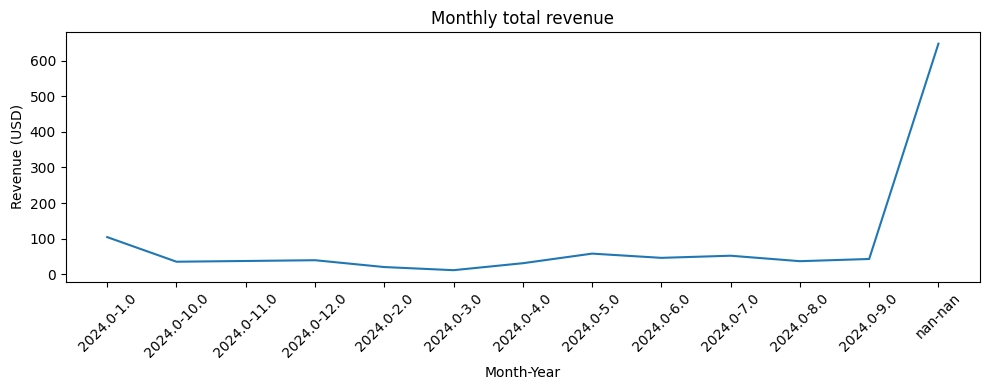

In [ ]:
df['YearMonth'] = df['Day'].dt.year.astype(str) + '-' + df['Day'].dt.month.astype(str).str.zfill(2)
df_plot = df.withColumn('YearMonth', when(col('Day').isNotNull(), date_format(col('Day'), 'yyyy-MM')).otherwise(None))
monthly = df.groupby(['YearMonth']).agg(
    sessions=('Sessions','sum'),
    transactions=('Transactions','sum'),
    revenue=('Revenue','sum')
).sort_index().reset_index()
print(monthly.head().to_string(index=False))

# Plot monthly revenue
plt.figure(figsize=(10,4))
plt.plot(monthly['YearMonth'],  monthly['revenue'])
plt.title('Monthly total revenue')
plt.xlabel('Month-Year')
plt.ylabel('Revenue (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


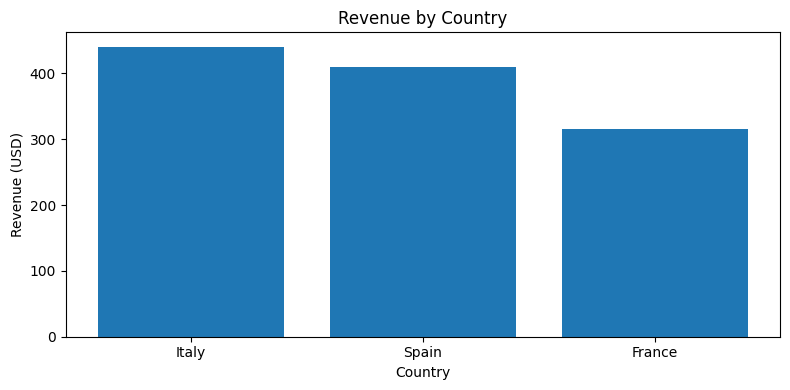

In [11]:
# 8) Bar chart: revenue by country
country_rev = by_country.sort_values('revenue', ascending=False)
plt.figure(figsize=(8,4))
plt.bar(country_rev['Country'], country_rev['revenue'])
plt.title('Revenue by Country')
plt.xlabel('Country')
plt.ylabel('Revenue (USD)')
plt.tight_layout()
plt.show()


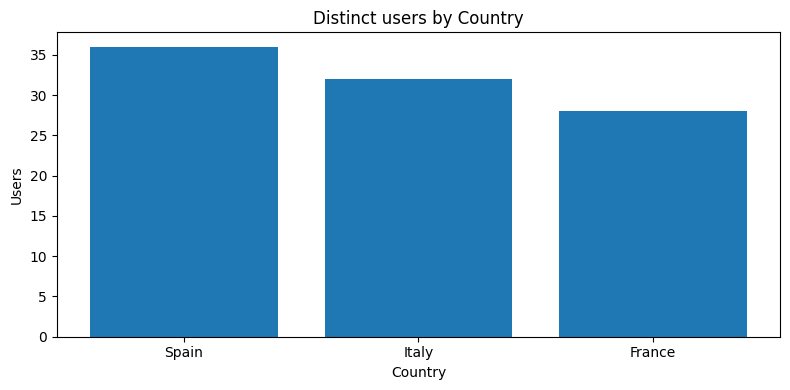

In [12]:
# 9) Bar chart: distinct users by country
country_users = by_country.sort_values('users', ascending=False)
plt.figure(figsize=(8,4))
plt.bar(country_users['Country'], country_users['users'])
plt.title('Distinct users by Country')
plt.xlabel('Country')
plt.ylabel('Users')
plt.tight_layout()
plt.show()


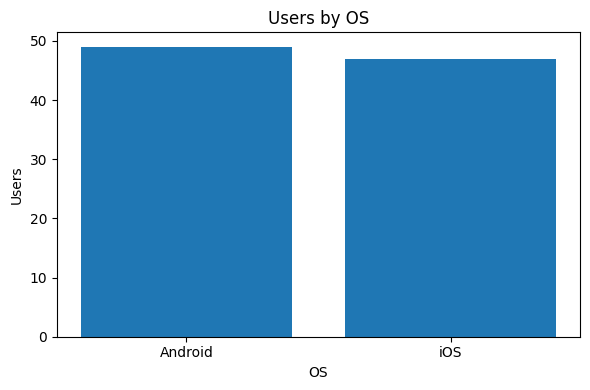

In [13]:
# 10) OS share (pie-like bar) - show as bar
os_share = by_os.sort_values('users', ascending=False)
plt.figure(figsize=(6,4))
plt.bar(os_share['OS'], os_share['users'])
plt.title('Users by OS')
plt.xlabel('OS')
plt.ylabel('Users')
plt.tight_layout()
plt.show()


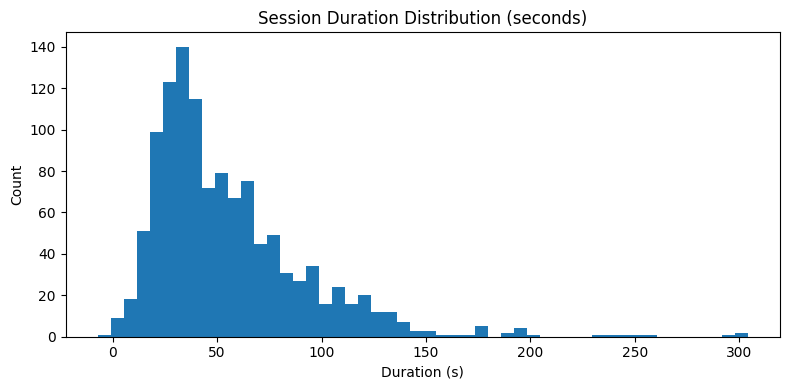

In [14]:
# 11) Distribution of session durations (histogram)
plt.figure(figsize=(8,4))
plt.hist(df['Duration'].dropna(), bins=50)
plt.title('Session Duration Distribution (seconds)')
plt.xlabel('Duration (s)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


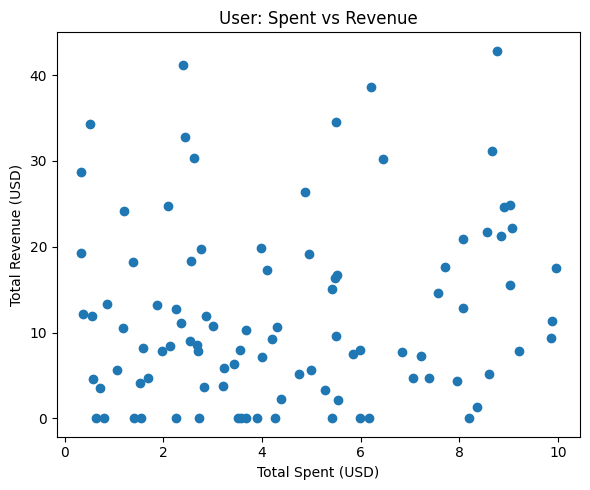

In [15]:
# 12) Scatter: total spent vs revenue aggregated by UserID
user_agg = df.groupby('UserID').agg(spent=('Spent','sum'), revenue=('Revenue','sum'), sessions=('Sessions','sum')).reset_index()
plt.figure(figsize=(6,5))
plt.scatter(user_agg['spent'], user_agg['revenue'])
plt.title('User: Spent vs Revenue')
plt.xlabel('Total Spent (USD)')
plt.ylabel('Total Revenue (USD)')
plt.tight_layout()
plt.show()


In [16]:
# 13) Top 10 users by revenue
top_users = user_agg.sort_values('revenue', ascending=False).head(10)
print(top_users.to_string(index=False))


 UserID    spent   revenue  sessions
  31396 8.767578 42.840096        59
  11966 2.400073 41.196872        42
  71241 6.209037 38.601581        49
  53384 5.505749 34.498733        39
  82481 0.514882 34.254866        30
  30475 2.436333 32.736830        42
  36217 8.670099 31.128853        38
  66380 2.621916 30.371053        24
  90680 6.452227 30.271621        32
  36969 0.327526 28.735821        38
